# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
It consists of 21 columns [id, imdb_id, popularity, budget, revenue , original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj
]
### Questions for Analysis
> 1. What are the movies with largest and lowest profit ?
> 2. What are the movies with largest and lowest budgets ?
> 3. What are the movies with largest and lowest earned revenu ?
> 4. What are the movies with longest and shortest runtime values ?
> 5. What are the movies with highest and lowest popularity ?
> 6. What are the movies with highest and lowest vote count ?
> 7. What are the movies with highest and lowest vote average ?
> 8. What is the average of popularity & runtime & vote_count & vote_average & budget & revenue & profit earned of the movies ?
> 9. What is the year in which we had most number of profitable movies ?
> 10. What are the most common genres of movies ?
> 11. What is the most frequent cast ?
> 12. What is the most frequant production companies ?
> 13. What is the most frequant director ?
> 14. Which genres are most popular from year to year ?
> 15. What kinds of properties are associated with movies that have high revenues ?



In [81]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

After studying the general idea of the dataset and asking questions for the analysis. Now it is time to load, assessing and cleaning the data  
### General Properties

In [82]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the data by reading the csv file
df = pd.read_csv('tmdb-movies.csv')

#print out the first five rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Asessing

In [83]:
df.shape

(10866, 21)

In [84]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [86]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

> **Processes we will do to clean the data**
>
> 1. Removeing some columns that we will not use such as [ 'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview'].
> 2. Droping the duplicated rows.
> 3. Replacing zeros with NAN and droping these values.
> 4. Convert the data type of 'release_date' column to 'datetime'.

> 1. Removeing some columns that we will not use such as [ 'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview'].


In [87]:
#deleting the columns
df= df.drop([ 'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview'],axis=1)

# Print out the new dataset
df.head()

,popularity,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **2. Droping the duplicated rows.**
>

In [88]:
# Number of duplicated rows
sum(df.duplicated())

1

In [89]:
# Droping the duplicated rows
df.drop_duplicates(inplace=True)

In [90]:
# Making sure that there is no any duplicated rows
sum(df.duplicated())

0

>**3. Replacing zeros with NAN and droping these values.**
>


In [91]:
#replacing zeros with NaN of ['budget_adj', 'revenue_adj]' columns in the dataset
df[['budget_adj', 'revenue_adj']] = df[['budget_adj', 'revenue_adj']].replace(0, np.NAN)

In [92]:
#Droping all the rows which have NaN values 
df.dropna(axis = 0, subset = ['budget_adj', 'revenue_adj'] , inplace=True)

In [93]:
# mske sure that there is no Nan value in temp_list
df[['budget_adj', 'revenue_adj']].isnull().sum()

budget_adj     0
revenue_adj    0
dtype: int64

In [94]:
#replacing zeros with NaN of 'runtime' column in the dataset
df['runtime'] = df['runtime'].replace(0, np.NAN)

In [95]:
# print out the changed dataset
df.head()

,popularity,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **4. Convert the data type of 'release_date' column to 'datetime'.**

In [96]:
# convert the dtype of 'release_date' column to 'datetime'
df.release_date = pd.to_datetime(df['release_date'])

In [97]:
# make sure that dtype of 'release_date' column become 'datetime' 
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **1. Calculating the profit of the each movie**

In [98]:
# creat a new column 'profit_earned' that have the profit of each movie
df.insert(14,'profit_earned',df['revenue_adj']-df['budget_adj'])

#previewing the changes in the dataset
df.head()

,popularity,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_earned
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


### Research Question 1 : What are the movies with largest and lowest profit ?

In [99]:
#for largest earned profit
high= df['profit_earned'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned profit
low= df['profit_earned'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,1329,2244
popularity,12.037933,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
tagline,"A long time ago in a galaxy far, far away...",Assassin. Hero. Legend.
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74


> 'Star Wars' movie is the movie with the highest earned profit with '2,750,136,650.919176'.

> 'The Warrior's Way' movie is the movie with the lowest earned profit with '-413,912,431.0'.

### Research Question 2  : What are the movies with largest and lowest budgets ?

In [100]:
#for largest budgets
high= df['budget_adj'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned budgets
low= df['budget_adj'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,2244,3581
popularity,0.25054,0.52043
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
tagline,Assassin. Hero. Legend.,Here comes the ride.
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
release_date,2010-12-02 00:00:00,2011-06-03 00:00:00
vote_count,74,55


> 'The Warrior's Way' movie is the movie with the largest budget with '425,000,000.0'.

> 'Love, Wedding, Marriage' movie is the movie with the lowest budget with '0.969398'.

### Research Question 3 : What are the movies with largest and lowest earned revenu ?

In [101]:
#for largest revenu
high= df['revenue_adj'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned revenu
low= df['revenue_adj'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,1386,5067
popularity,9.432768,0.462609
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46


> 'Avatar' movie is the movie with the largest revenu with '2,827,123,750.41189'.

> 'Shattered Glass' movie is the movie with the lowest revenu with '2.370705'.

### Research Question 4 : What are the movies with longest and shortest runtime values ?

In [102]:
#for largest revenu
high= df['runtime'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned revenu
low= df['runtime'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,2107,5162
popularity,0.534192,0.208637
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
vote_count,35,16


> 'Carlos' movie is the movie with the longest runtime with '338'min.

> 'Kid's Story' movie is the movie with the shortest runtime with '15'min.

### Research Question 5 : What are the movies with highest and lowest popularity ?

In [103]:
#for largest revenu
high= df['popularity'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned revenu
low= df['popularity'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,0,7268
popularity,32.985763,0.001117
original_title,Jurassic World,Born into Brothels
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni
director,Colin Trevorrow,Zana Briski|Ross Kauffman
tagline,The park is open.,NaN
runtime,124,85
genres,Action|Adventure|Science Fiction|Thriller,Documentary
production_companies,Universal Studios|Amblin Entertainment|Legenda...,NaN
release_date,2015-06-09 00:00:00,2004-12-08 00:00:00
vote_count,5562,23


> 'Jurassic World' movie is the movie with the highest popularity with '32.985763 %'.

> 'Born into Brothels' movie is the movie with the lowest popularity with '0.001117 %'.

### Research Question 6 : What are the movies with highest and lowest vote count ?

In [104]:
#for largest revenu
high= df['vote_count'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned revenu
low= df['vote_count'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,1919,1818
popularity,9.363643,0.159638
original_title,Inception,Beautiful
cast,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Deborra-Lee Furness|Peta Wilson|Aaron Jeffery|...
director,Christopher Nolan,Dean O'Flaherty
tagline,Your mind is the scene of the crime.,NaN
runtime,148,97
genres,Action|Thriller|Science Fiction|Mystery|Adventure,Drama|Mystery|Thriller
production_companies,Legendary Pictures|Warner Bros.|Syncopy,Kojo Pictures
release_date,2010-07-14 00:00:00,2009-04-27 00:00:00
vote_count,9767,10


> 'Inception' movie is the movie with the highest vote count with '9767' person.

> 'Beautiful' movie is the movie with the lowest vote count with '10' person.

### Research Question 7 : What are the movies with highest and lowest vote average ?

In [105]:
#for largest revenu
high= df['vote_average'].idxmax()
high_info=pd.DataFrame(df.loc[high])
    
#for lowest earned revenu
low= df['vote_average'].idxmin()
low_info=pd.DataFrame(df.loc[low])
    
#concatenating data
info=pd.concat([high_info, low_info], axis=1)
info

,4178,4859
popularity,7.192039,0.111351
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
tagline,Fear can hold you prisoner. Hope can set you f...,When good food... goes bad!
runtime,142,87
genres,Drama|Crime,Animation|Action|Comedy|Family
production_companies,Castle Rock Entertainment,Threshold Entertainment|Lions Gate Family Ente...
release_date,1994-09-10 00:00:00,2012-06-15 00:00:00
vote_count,5754,12


> 'The Shawshank Redemption	' movie is the movie with the highest vote average with '8.4/10'.

> 'Foodfight!' movie is the movie with the lowest vote average with '2.2/10'.

### Research Question 8 : What is the average of popularity & runtime & vote_count & vote_average & budget & revenue & profit earned of the movies ?

In [106]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_earned
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,1.940715e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


**Popularity**

In [107]:
#getting specific popularity 
df['popularity'].describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462367
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

>The average popularity of a movie is 1.191554 %.

### Graphical Approach 

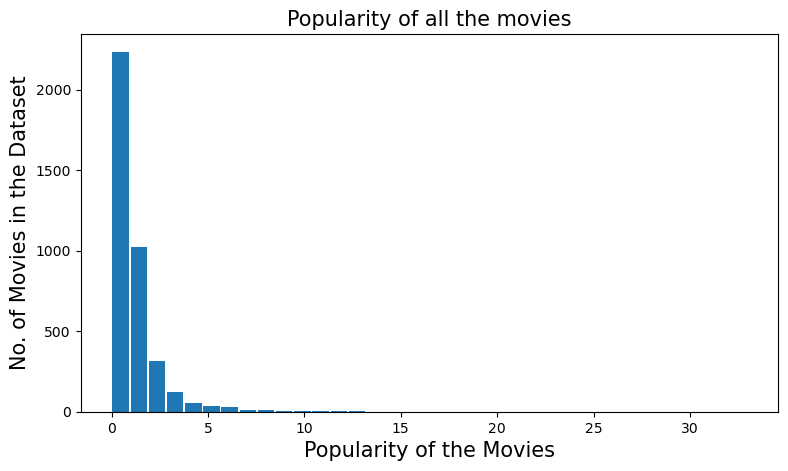

In [108]:
#plotting a histogram of popularity of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Popularity of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Popularity of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['popularity'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

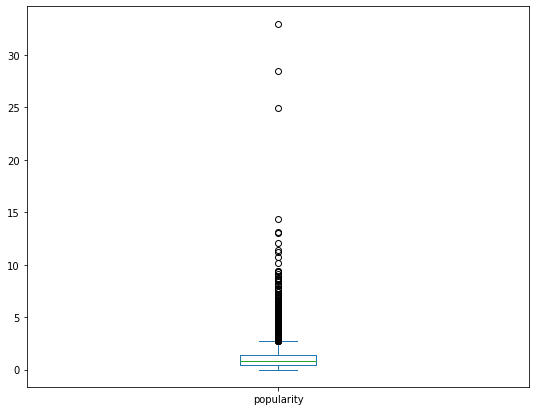

In [109]:
df['popularity'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a popularity of 0.462367 .
> 2. 50% of movies have a popularity of 0.797511 . (median)
> 3. 75% of movies have a popularity of 1.368324 .


**Runtime**

In [110]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>The average runtime of a movie is 109 minutes.


### Graphical Approach

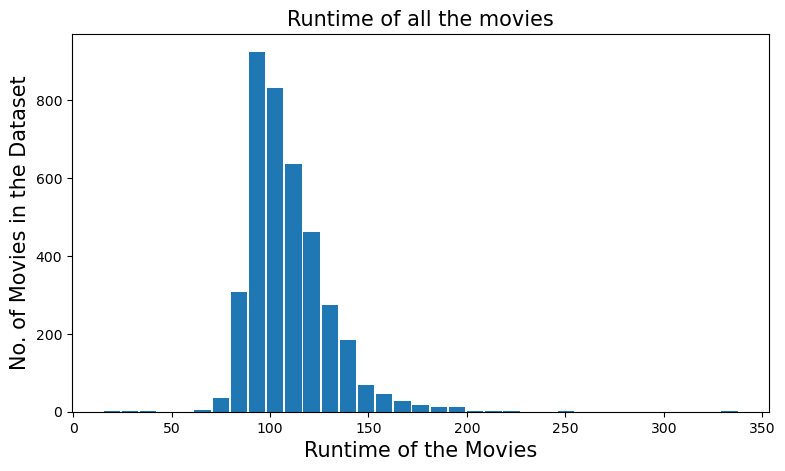

In [111]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

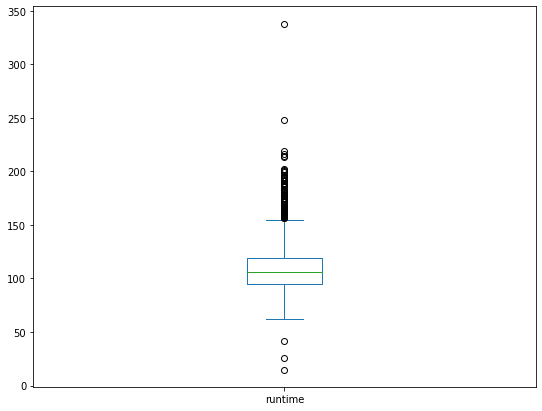

In [112]:
df['runtime'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a runtime of less than 95 minutes
> 2. 50% of movies have a runtime of less than 109 minutes. (median)
> 3. 75% of movies have a runtime of less than 119 minutes


**Vote_count**

In [113]:
#getting specific vote_count 
df['vote_count'].describe()

count    3854.000000
mean      527.720291
std       879.956821
min        10.000000
25%        71.000000
50%       204.000000
75%       580.000000
max      9767.000000
Name: vote_count, dtype: float64

>The average vote count of a movie is 527.720291 .


### Graphical Approach 

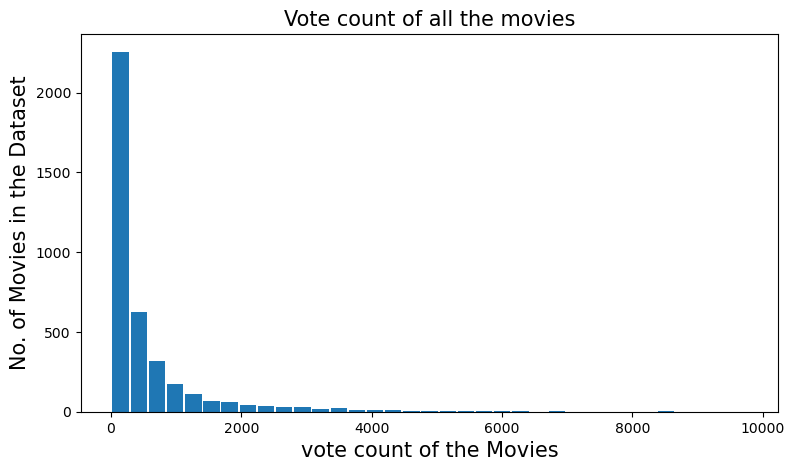

In [114]:
#plotting a histogram of vote count of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('vote count of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Vote count of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['vote_count'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

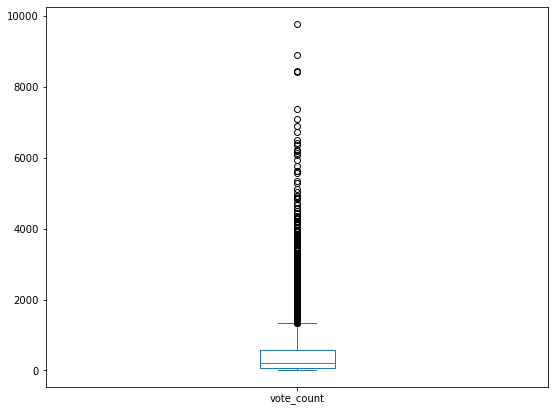

In [115]:
df['vote_count'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a vote count of 71.000000 .
> 2. 50% of movies have a vote count of 204.000000 . (median)
> 3. 75% of movies have a vote count of 580.000000 .


**Vote_average**

In [116]:
#getting specific popularity 
df['vote_average'].describe()

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

>The average vote average of a movie is 6.168163 .


### Graphical Approach 

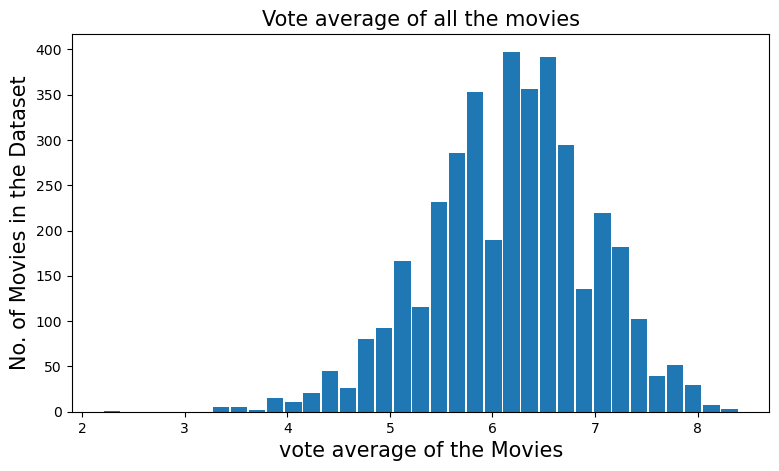

In [117]:
#plotting a histogram of vote average of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('vote average of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Vote average of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['vote_average'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

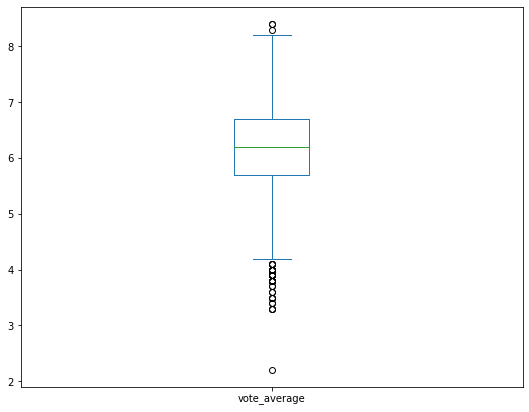

In [118]:
df['vote_average'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a vote average of 5.700000 .
> 2. 50% of movies have a vote average of 6.200000 . (median)
> 3. 75% of movies have a vote average of 6.700000 .


**Budget**

In [119]:
#getting specific popularity 
df['budget_adj'].describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

>The average budget of a movie is 4.423999e+07 .


### Graphical Approach

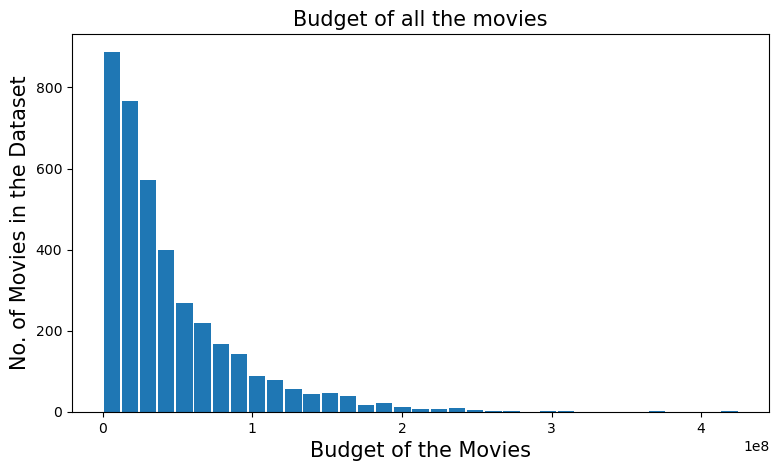

In [120]:
#plotting a histogram of budget of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Budget of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Budget of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['budget_adj'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

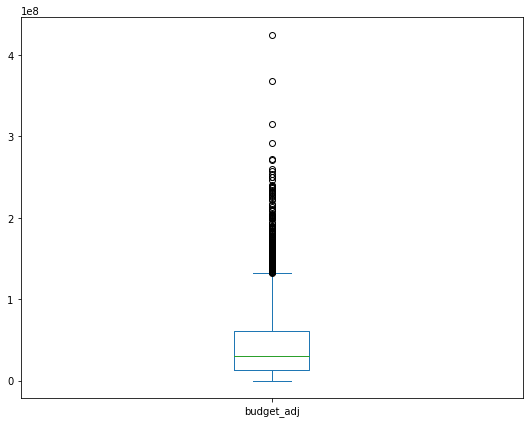

In [121]:
df['budget_adj'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a budget of 1.309053e+07 .
> 2. 50% of movies have a budget of 3.001611e+07 . (median)
> 3. 75% of movies have a budget of 6.061307e+07 .


**Revenue**

In [122]:
#getting specific popularity 
df['revenue_adj'].describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

>The average revenue of a movie is 1.370647e+08 .


### Graphical Approach

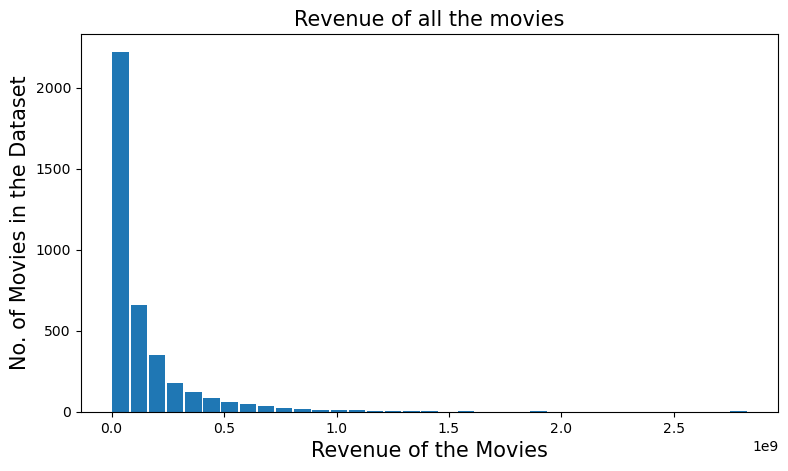

In [123]:
#plotting a histogram of revenue of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Revenue of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Revenue of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['revenue_adj'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

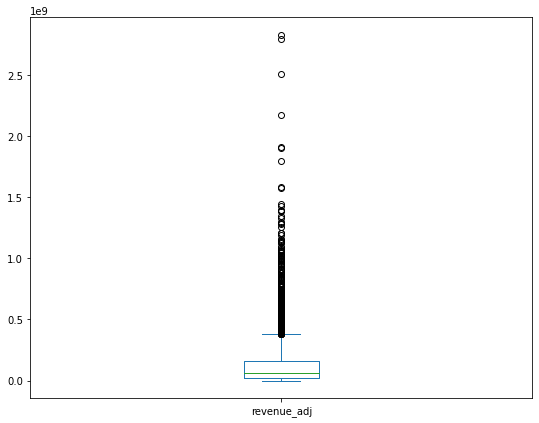

In [124]:
df['revenue_adj'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a revenue of 1.835735e+07 .
> 2. 50% of movies have a revenue of 6.173068e+07 . (median)
> 3. 75% of movies have a revenue of 1.632577e+08 .


**Profit earned **

In [125]:
#getting specific popularity 
df['profit_earned'].describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit_earned, dtype: float64

>The average profit earned of a movie is  9.282470e+07.

### Graphical Approach

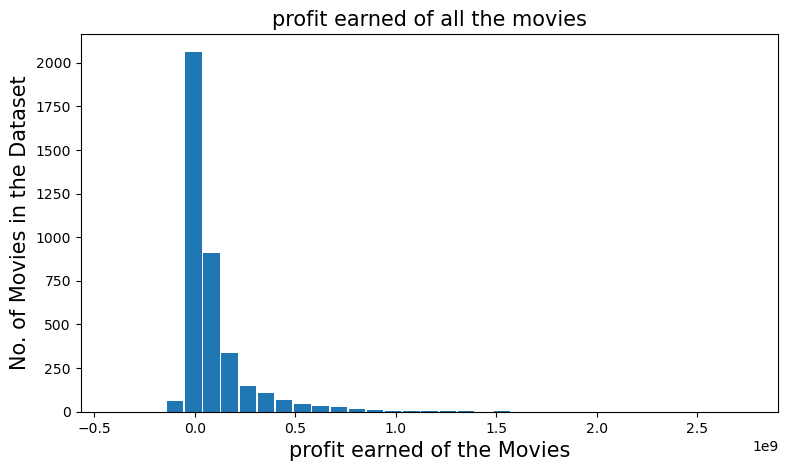

In [126]:
#plotting a histogram of profit earned of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('profit earned of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No. of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('profit earned of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['profit_earned'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

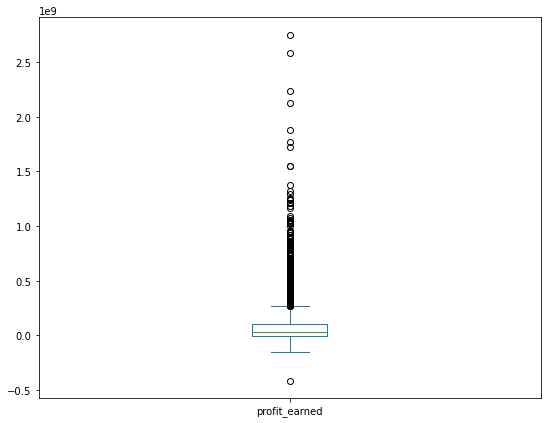

In [127]:
df['profit_earned'].plot(kind='box', figsize=(9,7));

>By looking at the box plot and calculations, we can conclude that..
>
> 1. 25% of movies have a profit earned  of -1.504995e+06 .
> 2. 50% of movies have a profit earned  of 2.737064e+07 . (median)
> 3. 75% of movies have a profit earned  of 1.074548e+08 .


### Research Question 9 : What is the year in which we had most number of profitable movies ?

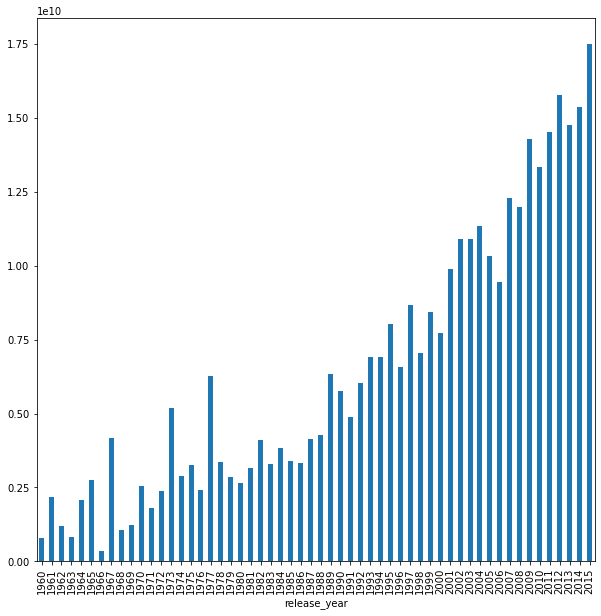

In [128]:
profits_year = df.groupby('release_year')['profit_earned'].sum()
profits_year.plot(kind = 'bar', figsize = (10,10));

In [129]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

> From the plot and calculations '2015' was the year where movies made the highest profit.




### Research Question 10 : What are the most common genres of movies ?

In [130]:
#will take a column, and separate the string by '|'
df1 = df['genres'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df1 = pd.Series(df1.split('|'))
    
#arranging in descending order
count = df1.value_counts(ascending = False)
count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

### Graphical Approach

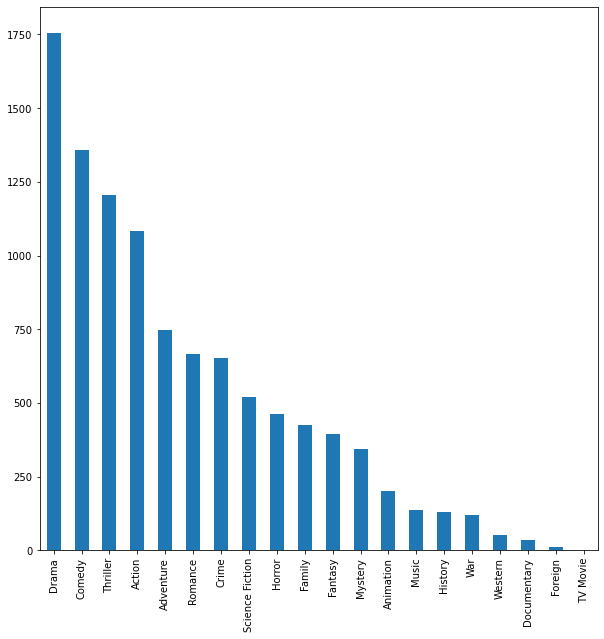

In [131]:
count.plot(kind='bar', figsize = (10,10));

'Drama' is the most common genres of movies with '1756' movies.

### Research Question 11 : What is the most frequent cast ?

In [132]:
#will take a column, and separate the string by '|'
df1 = df['cast'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df1 = pd.Series(df1.split('|'))
    
#arranging in descending order
count = df1.value_counts(ascending = False)
count.head()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64

> The most frequent cast are 'Robert De Niro' with 52 cast followed by 'Bruce Willis' with 46 and 'Samuel L. Jackson' with 44.  

### Research Question 12 : What is the most frequant production companies ?

In [133]:
#will take a column, and separate the string by '|'
df1 = df['production_companies'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df1 = pd.Series(df1.split('|'))
    
#arranging in descending order
count = df1.value_counts(ascending = False)
count.head()

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

'Universal Pictures' is the most frequant production company of movies with '329' movies.

### Research Question 13 : What is the most frequant director ?

In [134]:
#will take a column, and separate the string by '|'
df1 = df['director'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df1 = pd.Series(df1.split('|'))
    
#arranging in descending order
count = df1.value_counts(ascending = False)
count.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Tim Burton          17
dtype: int64

'Steven Spielberg' is the most frequant director of movies with '28' movies.

### Research Question 14 : Which genres are most popular from year to year?

In [135]:
arr = df['release_year'].unique()

In [136]:
arr.sort()

In [137]:
arr

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [138]:
for x in arr:
    df1 = df.query(f"release_year == {x}")
    #will take a column, and separate the string by '|'
    df2 = df1['genres'].str.cat(sep = '|')

    #giving pandas series and storing the values separately
    df2 = pd.Series(df2.split('|'))

    #arranging in descending order
    count = df2.value_counts(ascending = False)
    print(f"The genres that are more common in {x} is {count.head(1)}")

The genres that are more common in 1960 is Drama    3
dtype: int64
The genres that are more common in 1961 is Drama    6
dtype: int64
The genres that are more common in 1962 is Drama    5
dtype: int64
The genres that are more common in 1963 is Thriller    3
dtype: int64
The genres that are more common in 1964 is Drama    4
dtype: int64
The genres that are more common in 1965 is Drama    3
dtype: int64
The genres that are more common in 1966 is Drama    2
dtype: int64
The genres that are more common in 1967 is Drama    7
dtype: int64
The genres that are more common in 1968 is Drama    6
dtype: int64
The genres that are more common in 1969 is Adventure    2
dtype: int64
The genres that are more common in 1970 is Drama    7
dtype: int64
The genres that are more common in 1971 is Thriller    8
dtype: int64
The genres that are more common in 1972 is Drama    3
dtype: int64
The genres that are more common in 1973 is Drama    7
dtype: int64
The genres that are more common in 1974 is Drama    

### Research Question 15 : What kinds of properties are associated with movies that have high revenues ?

In [139]:
#selecting the movies having revenue 1 Billion or more
revenue_data = df[df['revenue_adj'] >= 1000000000]

#reindexing new data
revenue_data.index = range(len(revenue_data))

#we will start from 1 instead of 0
revenue_data.index = revenue_data.index + 1

#print out the new dataset
revenue_data.head()

,popularity,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_earned
1,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
2,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
3,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
4,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
5,5.944927,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1.035032e+09


In [140]:
# counting no. of the rows in the new data base
len(revenue_data)

44

**Properties that are associated with movies that have high revenues (44 movies)**

**Average popularity**

In [141]:
revenue_data['popularity'].mean()

5.768757227272726

**Average budget**

In [142]:
revenue_data['budget_adj'].mean()

133489129.50908175

**Average revenue**

In [143]:
revenue_data['revenue_adj'].mean()

1363139435.3753734

**Most frequent cast**

In [144]:
#will take a column, and separate the string by '|'
df3 = revenue_data['cast'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df3 = pd.Series(df3.split('|'))
    
#arranging in descending order
count = df3.value_counts(ascending = False)
count.head()

Orlando Bloom       5
Emma Watson         4
Rupert Grint        4
Daniel Radcliffe    4
Harrison Ford       4
dtype: int64

**Most frequent director**

In [145]:
#will take a column, and separate the string by '|'
df3 = revenue_data['director'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df3 = pd.Series(df3.split('|'))
    
#arranging in descending order
count = df3.value_counts(ascending = False)
count.head()

Steven Spielberg       4
Peter Jackson          3
Wolfgang Reitherman    2
Joss Whedon            2
George Lucas           2
dtype: int64

**Average runtime**

In [146]:
revenue_data['runtime'].mean()

136.1818181818182

**Most common genres**

In [147]:
#will take a column, and separate the string by '|'
df3 = revenue_data['genres'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df3 = pd.Series(df3.split('|'))
    
#arranging in descending order
count = df3.value_counts(ascending = False)
count.head()

Adventure          32
Action             23
Science Fiction    16
Fantasy            15
Family             15
dtype: int64

**Most frequent production company**

In [148]:
#will take a column, and separate the string by '|'
df3 = revenue_data['production_companies'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
df3 = pd.Series(df3.split('|'))
    
#arranging in descending order
count = df3.value_counts(ascending = False)
count.head()

Walt Disney Pictures                      8
Warner Bros.                              8
Twentieth Century Fox Film Corporation    6
Lucasfilm                                 5
Universal Pictures                        5
dtype: int64

**Average vote count**

In [149]:
revenue_data['vote_count'].mean()

3653.2727272727275

**Average vote average**

In [150]:
revenue_data['vote_average'].mean()

7.177272727272729

**Most frequent release year**

In [151]:
revenue_data['release_year'].value_counts().head()

2015    5
2012    3
2013    2
2010    2
2001    2
Name: release_year, dtype: int64

<a id='conclusions'></a>
## Conclusions
> After this analysis we can conclude following:
>
> **properties of a high revenue movie :**
> 1. Average popularity must be 5.768757227272726
> 2. Average Budget must be 133,489,129.50908175
> 3. Average revenue must be 1,363,139,435.3753734
> 4. Average runtime must be 136.1818181818182
> 5. Average vote count must be around 3653
> 6. Average vote average must be 7.177272727272729
> 7. Any one of these should be in the cast :Orlando Bloom, Emma Watson, Rupert Grint, Daniel Radcliffe, Harrison Ford
> 8. Director should be one of : Steven Spielber,g Peter Jackson, Wolfgang Reitherman, Joss Whedon, George Lucas
> 9. Genres must be : Adventure, Action, Science Fiction, Fantasy, Family
> 10. The production company should be one of : Walt Disney Pictures, Warner Bros., Twentieth Century Fox Film Corporation, Lucasfilm, Universal Pictures
> 11. The release year should be in : 2015, 2012, 2013, 2010, 2001

>
> By doing all this the movie might be one of the hits and hence can earn an average revenue of around 255 million  dollar.
>
### Limitations 
There is a lot of rows that do not have values or have missing values and dropping them will affect the results of the analysis. 
